# Intro
Textual Augmentation methods
:

Synonym Replacement: Replace words in the reviews with their synonyms. You can use WordNet or similar resources to find synonyms.

Random Insertion: Insert random words into the text.

Random Deletion: Delete random words from the text.

Random Swap: Swap the positions of two random words in the text.

# Augmentation using synonym replacement

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drop null values

In [7]:
import pandas as pd
reviews = pd.read_csv('raw.csv')
reviews.dropna(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


# Apply augmentation functions on the raw dataset and save to augmented_reviews.csv

In [18]:
import csv
import nltk
import random
from nltk.corpus import wordnet


nltk.download('punkt')
nltk.download('wordnet')

# Function for synonym replacement
def synonym_replacement(text, n=1):
    augmented_reviews = []
    for _ in range(n):
        augmented_text = text
        words = text.split()
        for i, word in enumerate(words):
            synsets = wordnet.synsets(word)
            if synsets:
                synonyms = [lemma.name() for lemma in synsets[0].lemmas()]
                if synonyms:
                    synonym = random.choice(synonyms)
                    words[i] = synonym
        augmented_text = ' '.join(words)
        augmented_reviews.append(augmented_text)
    return augmented_reviews

# Input and output CSV filenames
input_csv_filename = 'raw.csv'
output_csv_filename = 'augmented_reviews_synonym.csv'

# Create a CSV file to save the augmented data
with open(output_csv_filename, 'w', newline='', encoding='utf-8') as output_csvfile:
    fieldnames = ['Review', 'Sentiment']
    writer = csv.DictWriter(output_csvfile, fieldnames=fieldnames)
    
    # Write the CSV header
    writer.writeheader()

    # Read reviews from the input CSV file and apply synonym replacement
    with open(input_csv_filename, 'r', encoding='utf-8') as input_csvfile:
        reader = csv.reader(input_csvfile)
        next(reader)  # Skip the header row if it exists
        for row in reader:
            review = row[0]  # Assuming the review text is in the first column
            sentiment = row[1]  # Assuming the sentiment is in the second column
            augmented_reviews = synonym_replacement(review, n=3)
            for augmented_review in augmented_reviews:
                writer.writerow({'Review': augmented_review, 'Sentiment': sentiment})


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessing

In [3]:
import pandas as pd
reviews = pd.read_csv('augmented_reviews_synonym.csv')
reviews.head()

# make less than 3 sentiment as negative
reviews.loc[reviews['Sentiment']<=3,'Sentiment'] = 0

# make more than 3 sentiment as positive
reviews.loc[reviews['Sentiment']>3,'Sentiment'] = 1

reviews = pd.read_csv('augmented_reviews_synonym.csv')
reviews.dropna(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74997 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     74997 non-null  object
 1   Sentiment  74997 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
reviews.head()

,Review,Sentiment
0,fasting transport only this product be very ch...,1
1,fasting transportation just this product be ve...,1
2,fast transport simply this ware be very cheapl...,1
3,This case takings sol long to ship and it's no...,1
4,This instance return sol long to ship and it's...,1


In [10]:
import nltk
nltk.download('stopwords')

# Import stopwords after downloading
from nltk.corpus import stopwords

# Define stopwords after importing
stp_words = stopwords.words('english')

def clean_review(review):
    cleanreview = " ".join(word for word in review.split() if word not in stp_words)
    return cleanreview

# Assuming you have a DataFrame named 'reviews' with a column 'Review'
reviews['Review'] = reviews['Review'].apply(clean_review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:

reviews.head()



,Review,Sentiment
0,fasting transport product cheaply atomic_numbe...,1
1,fasting transportation product chintzily make ...,1
2,fast transport simply ware cheaply iodin bring...,1
3,This case takings sol long ship even worth IT ...,1
4,This instance return sol long ship non evening...,1


In [7]:
# make less than 3 sentiment as negative
reviews.loc[reviews['Sentiment']<=3,'Sentiment'] = 0

# make more than 3 sentiment as positive
reviews.loc[reviews['Sentiment']>3,'Sentiment'] = 1

reviews['Sentiment'].value_counts()

Sentiment
0    45000
1    29997
Name: count, dtype: int64

# Negative review wordcloud

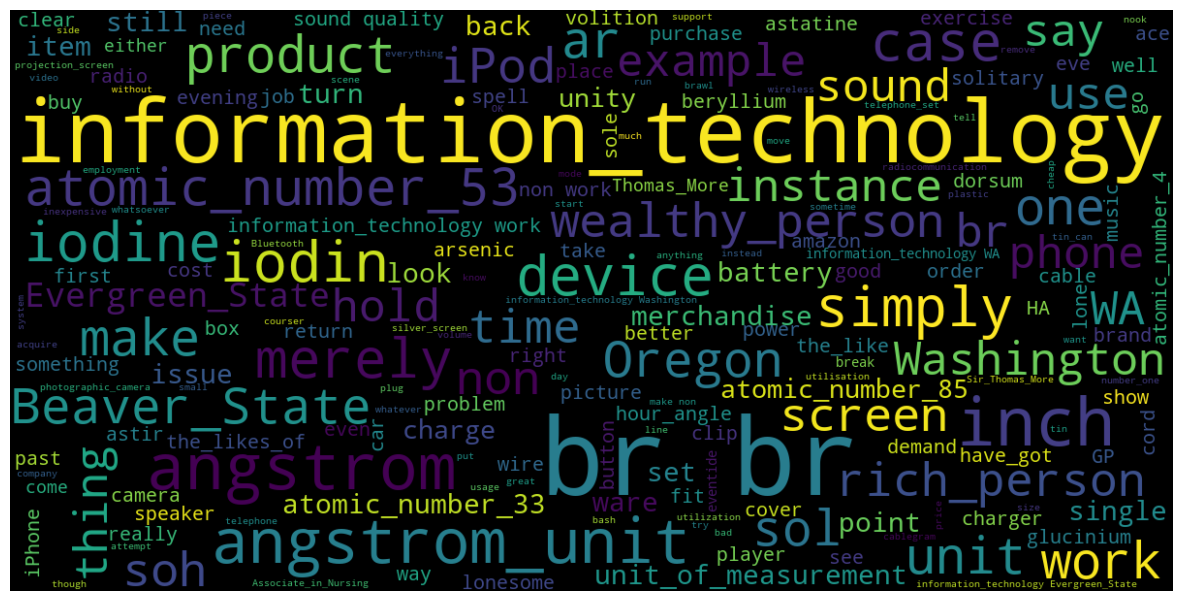

In [11]:

consolidated=' '.join(word for word in reviews['Review'][reviews['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1200,height=600,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


# Positive review wordcloud

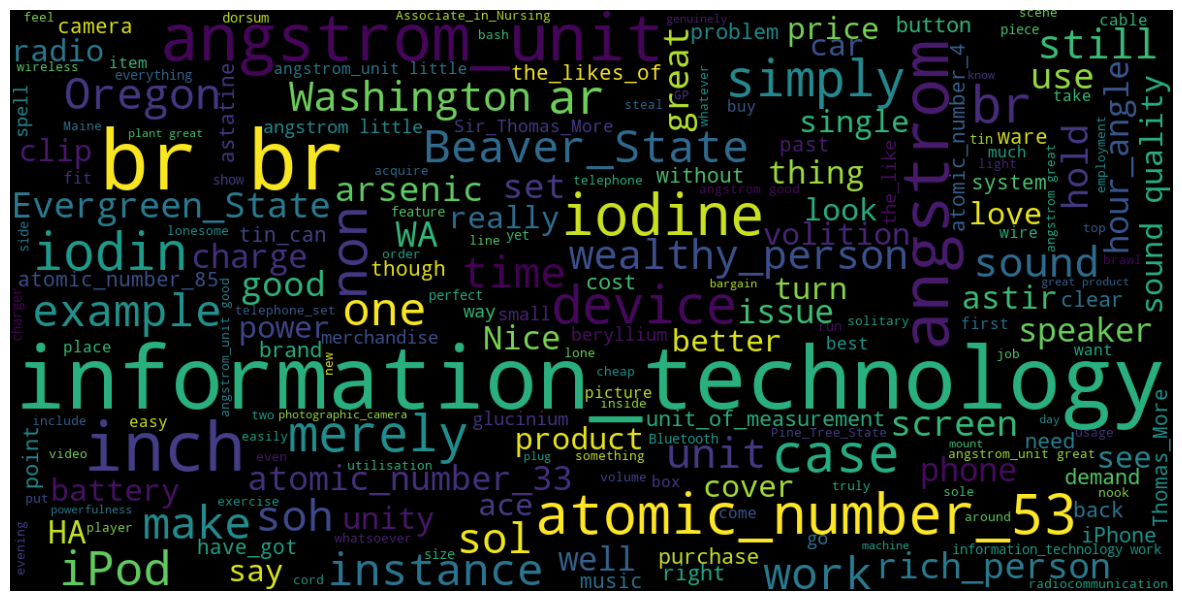

In [20]:
consolidated=' '.join(word for word in reviews['Review'][reviews['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1200,height=600,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


# Model training

In [12]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(reviews['Review'] ).toarray()

In [13]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,reviews['Sentiment'],
												test_size=0.25 ,
												random_state=42)


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model1=LogisticRegression()

#Model fitting
model1.fit(x_train,y_train)

#testing the model
pred=model1.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))


0.8309866666666667


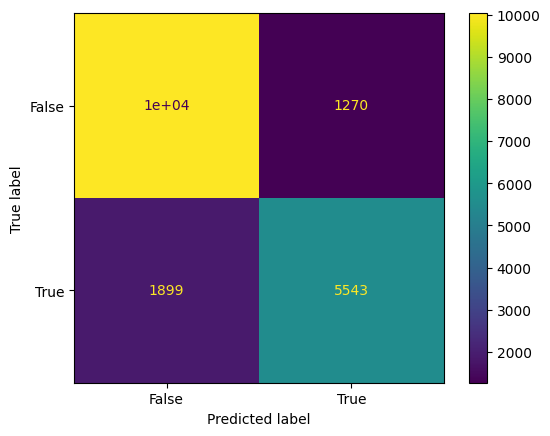

In [25]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


# Support Vector Machine

In [17]:
from sklearn import svm

# Model creation
model2 = svm.SVC()

# Model fitting
model2.fit(x_train, y_train)

# Testing the model
pred = model2.predict(x_test)

# Model accuracy
print(accuracy_score(y_test, pred))


0.9037866666666666


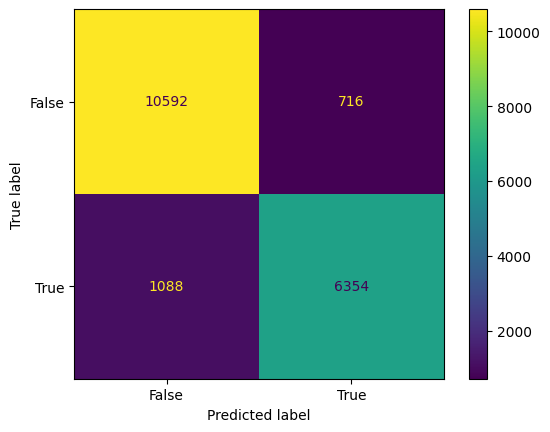

In [18]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


# Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Model creation
model3 = MultinomialNB()

# Model fitting
model3.fit(x_train, y_train)

# Testing the model
pred = model3.predict(x_test)

# Model accuracy
print(accuracy_score(y_test, pred))


0.7936533333333333


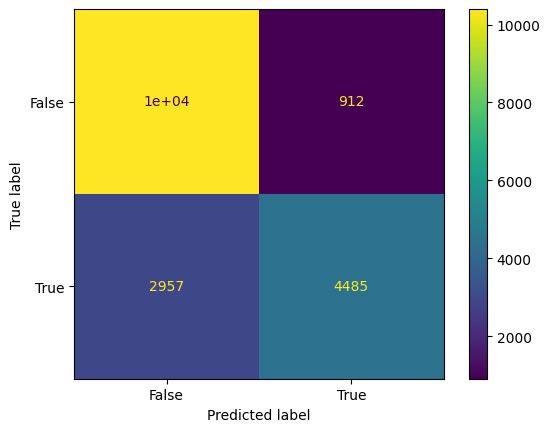

In [16]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


# Accuracy, training time comparison


Accuracy of Logistic Regression: 0.8309866666666667
Accuracy of SVM: 0.9037866666666666
Accuracy of Naive Bayes: 0.7936533333333333


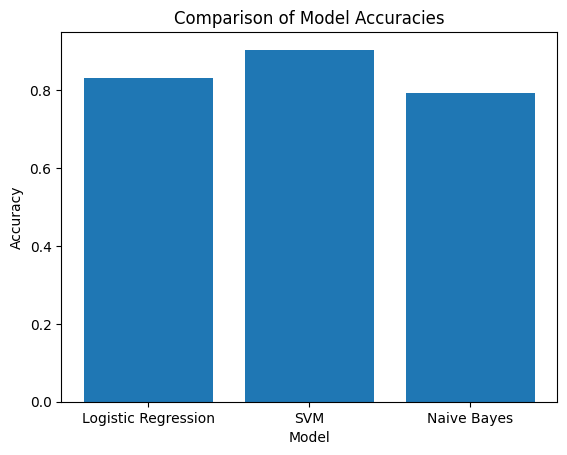

In [19]:
import matplotlib.pyplot as plt

# Calculate the accuracy of each model
accuracy_model_1 = accuracy_score(y_test, model1.predict(x_test))
accuracy_model_2 = accuracy_score(y_test, model2.predict(x_test))
accuracy_model_3 = accuracy_score(y_test, model3.predict(x_test))

# Print the accuracy of each model
print(f'Accuracy of Logistic Regression: {accuracy_model_1}')
print(f'Accuracy of SVM: {accuracy_model_2}')
print(f'Accuracy of Naive Bayes: {accuracy_model_3}')

# Create a bar plot to compare the accuracy of each model
plt.bar(['Logistic Regression', 'SVM', 'Naive Bayes'], [accuracy_model_1, accuracy_model_2, accuracy_model_3])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


# Improvements
Model__________________Pre-augmentation___Post-augmentation

Logistic Regression_________81.63%_____________83.09%

SVM Model_________________81.76%_____________90.37%

Naive Bayes Model_________78.94%_____________79.36%


# Conclusion
From the above comparison of accuracies & training times , it is observed that Naive Bayes Classifier performs the worst in our case.
The SVM Model, although taking a huge amount of time to train, performs much better than the other two.
Hence we should opt to use SVM Model in our future production.

Since we were able to noticeably improve our model and touch the 90% accuracy mark, therefore the data augmentation was successful.

# Save models

In [21]:
import pickle


with open('lr_model_aug.pkl', 'wb') as file:
    pickle.dump(model1, file) 
    
    
with open('svm_model_aug.pkl', 'wb') as file:
    pickle.dump(model2, file)

with open('nbc_model_aug.pkl', 'wb') as file:
    pickle.dump(model3, file)